In [6]:

from config import INTERM_DIR
import pickle
import matplotlib.pyplot as plt
import torch
import scienceplots

with open(INTERM_DIR / 'label_encoders.pkl', 'rb') as f:
    le = pickle.load(f) 

In [13]:
def load(fname):
    with open(fname, 'rb') as f:
        metric = pickle.load(f)
    return metric
     
all_metrics = {
    'GNNE':     load('../../interm/gnne_metrics.pickle'), 
    'DE':       load('../../interm/de_metrics.pickle'), 
    'IG':       load('../../interm/ig_metrics.pickle'), 
    'GNNE-all':    load('../../interm/gnne_adapted_metrics.pkl'),
    'GNNE-Embedds':    load('../../interm/gnne_adapted_embedds_only_metrics.pkl'),
     'GNNE-TS':    load('../../interm/gnne_adapted_TS_only_metrics.pkl'),
     'GNNE-M': load('../../interm/gnne_adapted_motif_only_metrics.pkl')
}

/home/taznk/COMP4003/venv/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [114]:
print(le["Attack"].classes_[1:])

['DDoS' 'DoS' 'Reconnaissance' 'Theft']


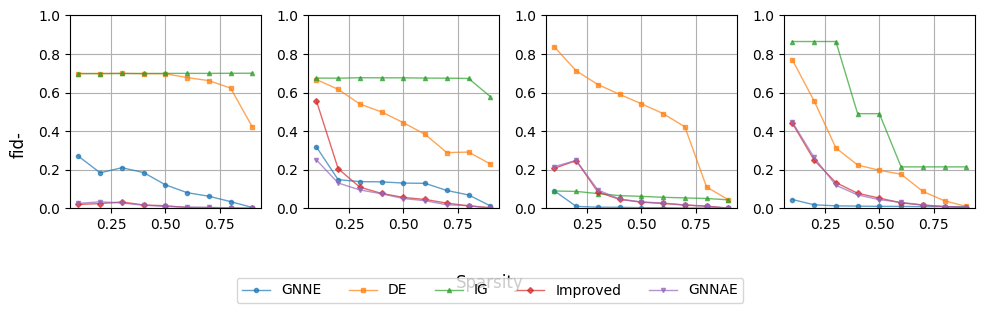

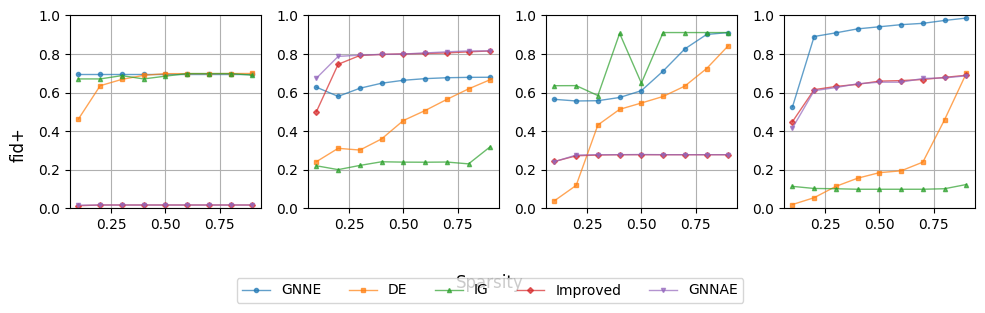

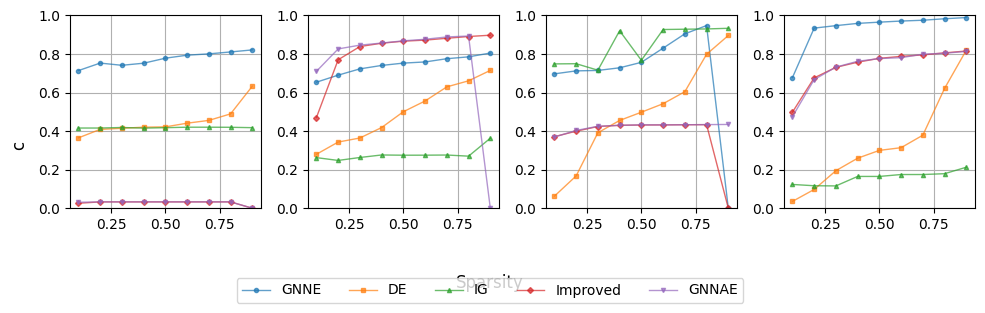

In [3]:
markers = ["o", "s", "^", "D", "v", "P", "X", "*"]  # circle, square, triangle, diamond, etc.
marker_map = {name: markers[i % len(markers)] for i, name in enumerate(all_metrics.keys())}

for metric in ("fid-", "fid+", "c"):
    fig, ax = plt.subplots(1, 4, figsize=(10, 3), sharex=True)

    with plt.style.context("science"):
        for rowi, attack in enumerate(le["Attack"].classes_[1:]):
            for name, metric_dict in all_metrics.items():
                sparsity_curve = metric_dict[f"{attack} sparsity curve"]
                ax[rowi].plot(
                    sparsity_curve["s"],
                    sparsity_curve[metric],
                    label=name if rowi == 0 else None,   # only label once
                    marker=marker_map[name],
                    markersize=3,
                    linewidth=1,
                    alpha=0.7
                )
    
    for a in ax:
        a.set_ylim(0, 1.0)
        a.grid(True)
        
    # --- shared labels & legend ---
    fig.supxlabel("Sparsity")
    fig.supylabel(metric)

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=len(all_metrics), bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
    plt.show()

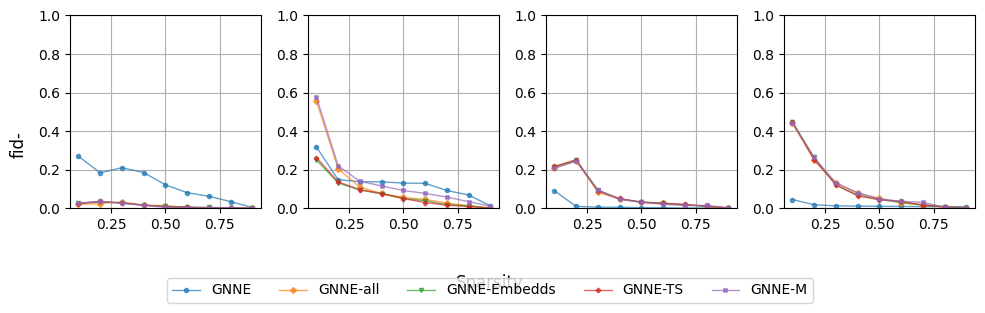

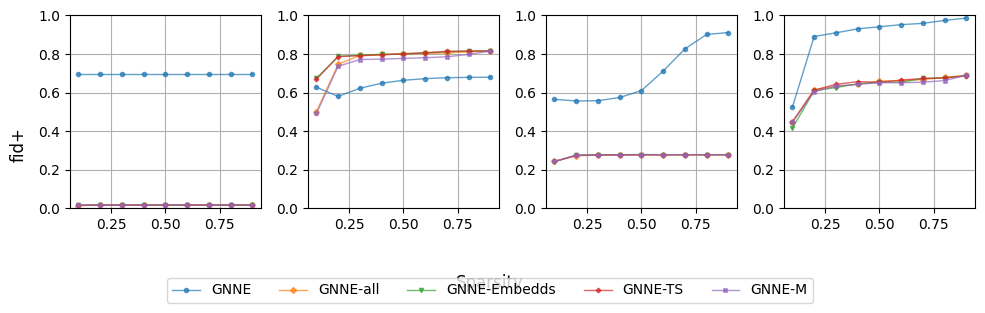

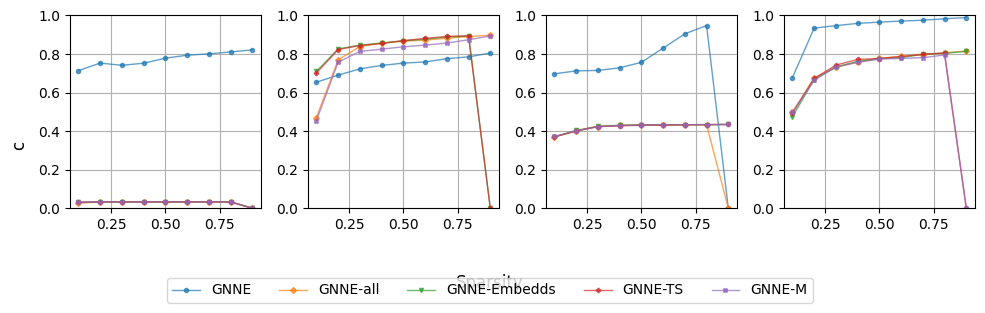

In [14]:
markers = ["o", "s", "^", "D", "v", "P", "X", "*"]  # circle, square, triangle, diamond, etc.
marker_map = {name: markers[i % len(markers)] for i, name in enumerate(all_metrics.keys())}

for metric in ("fid-", "fid+", "c"):
    fig, ax = plt.subplots(1, 4, figsize=(10, 3), sharex=True)

    with plt.style.context("science"):
        for rowi, attack in enumerate(le["Attack"].classes_[1:]):
            for name, metric_dict in all_metrics.items():
                if name not in ('DE', 'IG'):
                    sparsity_curve = metric_dict[f"{attack} sparsity curve"]
                    ax[rowi].plot(
                        sparsity_curve["s"],
                        sparsity_curve[metric],
                        label=name if rowi == 0 else None,   # only label once
                        marker=marker_map[name],
                        markersize=3,
                        linewidth=1,
                        alpha=0.7
                    )
    
    for a in ax:
        a.set_ylim(0, 1.0)
        a.grid(True)
        
    # --- shared labels & legend ---
    fig.supxlabel("Sparsity")
    fig.supylabel(metric)

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=len(all_metrics), bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
    plt.show()

### GNNEA

/home/taznk/COMP4003/venv/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


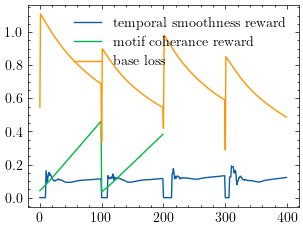

In [113]:
with open('../../interm/gnne_adapted_metrics.pkl', 'rb') as f:
        metrics = pickle.load(f)
        
with plt.style.context("science"):
    for m, l in metrics['epoch metrics'].items():
        if len(l) > 0:
            if type(l[0]) is torch.Tensor:
                plt.plot([ll.detach().numpy() for ll in l])
            else:
                plt.plot(l)

        plt.legend(metrics['epoch metrics'].keys())
    plt.show()